<a href="https://colab.research.google.com/github/EnesCaliskan/ImageToTextCNN/blob/main/Exam_Part_1_09_01_2024_9AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Exam for Deep Network Development course. First part (mandatory)**

This notebook contains the task to be solved in order to pass the exam.
This is the first part of the exam, which is compolsury in order to get a grade. It contains a task similar to what you have worked on during the semester, which consists on implementing a network architecture and a function.

Please note that, to **PASS** the Deep Network Development course you must **SUBMIT A SUCCESSFUL SOLUTION FOR THE FIRST PART**. If you **FAIL** the first part, you have the right to do the exam **ONE MORE TIME**. If you **FAIL AGAIN**, then unfortunately, you have failed the course. If you **PASS** the first part, then you get the weighted average of your quizzes and assignments as your final grade.

## Your information
Please fill the next cell with your information

**Full Name**:

**Neptun code:**

**Date:** 09/01/2024 9AM-10AM

## Task Description

#### Your task is to implement a custom architecture inspired by a image-to-image Diffusion like model, and the forward function. The model receives an intial image and a text as input (describes how the final image should look like) and generates an image according to the two.

#### Afterwards, make sure to run cell code number 1.2. to check if your implementation is correct.

#### This task should be **SOLVED IN 1 HOUR** and submitted to Canvas (download the .ipynb file). Please note that after 1 hour, the Canvas exam assignment will be closed and you cannot submit your solution.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#### **NO GPU IS NEEDED for this task**. No training nor any computationally expensive operation will be performed. This notebook runs on any computer using a cpu.

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device

## 1. Architecture

#### Please keep in mind that this architecture is purely imagined and should not correspond to any existing model / architecture. You will not find it on the internet.

Please right click the image and "Open image in a new tab" to view it better with zoom. Or download it from here: https://drive.google.com/file/d/11gey3SssCJe6CIUiFON9e-eoLdkegDna/view?usp=drive_link

<br>
<br>

![](https://drive.google.com/uc?export=view&id=11gey3SssCJe6CIUiFON9e-eoLdkegDna)

#### Input image

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg")
image = Image.open(BytesIO(response.content)).convert('RGB')
image = image.resize((256, 256))
image = np.rollaxis(np.array(image), 2, 0)

In [ ]:
image.shape

(3, 256, 256)

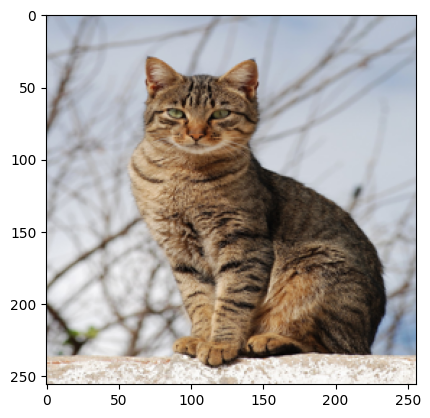

In [ ]:
plt.imshow(np.moveaxis(image, 0,-1))

In [ ]:
#Simple pre-processing
input_image = torch.tensor(image,dtype=torch.float32)
input_image = torch.unsqueeze(input_image, dim=0)
input_image.size()

torch.Size([1, 3, 256, 256])

#### Input text

In [ ]:
text = "A cat wearing sunglasses and suit"

# Simple preprocessing the text
word_to_ix = {"A": 0, "cat": 1, "wearing": 2, "sunglasses": 3, "and": 4, "suit": 5}
lookup_tensor = torch.tensor(list(word_to_ix.values()), dtype=torch.long) # a tensor representing words by integers

vocab_size = len(lookup_tensor)

In [ ]:
vocab_size

6

#### 1.1. Implement the architecture

In [ ]:
class TextEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, out_channels):
        super(TextEncoder, self).__init__()

        self.vocab_size = vocab_size
        self.embed = nn.Embedding(num_embeddings= vocab_size, embedding_dim= 1024)
        self.convTrans1 = nn.ConvTranspose2d(in_channels = 6, out_channels= 32, kernel_size=(4,4), stride = (4,4), padding = (0,0)) ##kernel??

        # DEFINE the layers

    def forward(self, input_text):
        # EMBED the input text

        print('\nTextEncoder\n')
        text_out = self.embed(input_text)
        print('text_out: ',text_out.shape)

        flatten = text_out.reshape(1,6,32,32)
        print('flatten: ',flatten.shape)

        convTrans1_out = self.convTrans1(flatten)
        print('convTrans1_out: ',convTrans1_out.shape)

        return convTrans1_out


        # RESHAPE the embeddings and SEND them to the next layer

        #return x

class ImageEncoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageEncoder, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3,3), stride = (1,1), padding = 'same')
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = (3,3), stride = (2,2), padding = 1)
        self.relu2 = nn.ReLU()
        self.norm1 = nn.BatchNorm2d(num_features = 64)
        # DEFINE the layers

    def forward(self, input_image):
        # SEND the input image and then the features to the given layers
        print('\nImage Encoder\n')
        conv1_out = self.conv1(input_image)
        print('conv1_out: ', conv1_out.shape)

        relu1_out = self.relu1(conv1_out)
        print('relu1_out: ', relu1_out.shape)

        conv2_out = self.conv2(relu1_out)
        print('conv2_out: ', conv2_out.shape)

        relu2_out = self.relu2(relu1_out)
        print('relu2_out: ', relu2_out.shape)

        norm1_out = self.norm1(relu1_out)
        print('relu2_out: ', relu2_out.shape)

        return norm1_out

        #return x

class ImageDecoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ImageDecoder, self).__init__()

        self.batchNormImg = nn.BatchNorm2d(num_features = 64)
        self.convTransImg1 = nn.ConvTranspose2d(in_channels = 64, out_channels = 3, kernel_size = (2,2), stride = (2,2), padding = 0)
        self.reluImg = nn.ReLU()
        # DEFINE the layers

    def forward(self, image_features):
        # SEND the image features to the given layers

        print('\nImage Decoder\n')
        batchNormImg_out = self.batchNormImg(image_features)
        print('batchNormImg_out: ', batchNormImg_out.shape)

        convTransImg1_out = self.convTransImg1(batchNormImg_out)
        print('convTransImg1_out: ', convTransImg1_out.shape)

        reluImg_out = self.reluImg(convTransImg1_out)
        print('reluImg_out: ', reluImg_out.shape)

        return reluImg_out
        #return x

class MyUNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(MyUNet, self).__init__()

        self.convUNet1 = nn.Conv2d(in_channels = 96, out_channels = 128, kernel_size = (3,3), stride = (1,1), padding = 'same')
        self.reluUNet1 = nn.ReLU()
        self.maxPoolUNet1 = nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))
        self.convUNet2 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (2,2), stride = (1,1), padding = 'same')
        self.reluUNet2 = nn.ReLU()
        self.convUNet3 = nn.Conv2d(in_channels = 256, out_channels = 64, kernel_size = (2,2), stride = (1,1), padding = 'same')
        self.reluUNet3 = nn.ReLU()
        self.convTransUNet1 = nn.ConvTranspose2d(in_channels = 320, out_channels = 128, kernel_size = (4,4), stride = (2,2), padding = 1) ## kernel ??
        self.convUNet4 = nn.Conv2d(in_channels = 256, out_channels = 64, kernel_size = (3,3), stride = (1,1), padding = 'same')
        self.reluUNet4 = nn.ReLU()

        # DEFINE the layers

    def forward(self, combined_features):
        # SEND the combined features to the given layers of the downscaling part of the U-Net

        print('\nUNET\n')
        convUNet1_out = self.convUNet1(combined_features)
        print('convUNet1_out: ', convUNet1_out.shape)

        reluUNet1_out = self.reluUNet1(convUNet1_out)
        print('reluUNet1_out: ', reluUNet1_out.shape)

        maxPoolUNet1_out = self.maxPoolUNet1(reluUNet1_out)
        print('maxPoolUNet1_out: ', maxPoolUNet1_out.shape)

        convUNet2_out = self.convUNet2(maxPoolUNet1_out)
        print('convUNet2_out: ', convUNet2_out.shape)

        reluUNet2_out = self.reluUNet2(convUNet2_out)
        print('reluUNet2_out: ', reluUNet2_out.shape)

        convUNet3_out = self.convUNet3(reluUNet2_out)
        print('convUNet3_out: ', convUNet3_out.shape)

        reluUNet3_out = self.reluUNet3(convUNet3_out)
        print('reluUNet3_out: ', reluUNet3_out.shape)

        combinedUNet1 = torch.cat((convUNet2_out,reluUNet3_out), dim=1)
        print('combinedUNet1: ', combinedUNet1.shape)

        convTransUNet1_out = self.convTransUNet1(combinedUNet1)
        print('convTransUNet1_out: ', convTransUNet1_out.shape)

        combinedUNet2 = torch.cat((reluUNet1_out,convTransUNet1_out), dim=1)
        print('combinedUNet2: ', combinedUNet2.shape)

        convUNet4_out = self.convUNet4(combinedUNet2)
        print('convUNet4_out: ', convUNet4_out.shape)

        reluUNet4_out = self.reluUNet4(convUNet4_out)
        print('reluUNet4_out: ', reluUNet4_out.shape)

        return reluUNet4_out



        # COMBINE the features before you send them to the ConvTranspose2d layer of the U-Net

        # SEND the COMBINED features to the ConvTranspose2d layer

        # COMBINE the features again before you send them to the last Conv2d layer of the U-Net

        # SEND the COMBINED features to the last Conv2d and ReLU layer of the U-Net

        #return x

class ImageToImageGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels):
        super(ImageToImageGenerator, self).__init__()
        # DEFINE the TEXT ENCODER, IMAGE ENCODER, U-NET, and IMAGE DECODER

        self.textEncoder = TextEncoder(vocab_size=vocab_size, embedding_dim = embedding_dim, out_channels = text_encoder_out_channels)
        self.imageEncoder = ImageEncoder(in_channels = 3, out_channels = image_encoder_out_channels)
        self.uNet = MyUNet(in_channels= 32, out_channels = unet_out_channels)
        self.imageDecoder = ImageDecoder(in_channels= 64, out_channels=3)

    def forward(self, input_text, input_image):
        # SEND the input text to the TEXT ENCODER

        textEncoder_out = self.textEncoder(input_text)
        print('textEncoder_out: ', textEncoder_out.shape)

        imageEncoder_out = self.imageEncoder(textEncoder_out)
        print('imageEncoder_out: ', imageEncoder_out.shape)


        # SEND the input image to the IMAGE ENCODER

        print('\nCombined\n')
        combinedImgText = torch.cat((textEncoder_out,imageEncoder_out), dim=1)
        print('combinedImgText: ', combinedImgText.shape)

        uNet_out = self.uNet(combinedImgText)
        print('uNet_out: ', uNet_out.shape)

        imageDecoder_out = self.imageDecoder(uNet_out)
        print('imageDecoder_out: ', imageDecoder_out.shape)

        # COMBINE the TEXT FEATURES form the TEXT ENCODER and IMAGE FETURES from the IMAGE ENCODER

        # SEND the COMBINED FETURES to the U-NET

        # SEND the IMAGE FETURES from the U-NET to the IMAGE DECODER

        return imageDecoder_out
        #return generated_image

#### 1.2. Test your implementation
Expected output

torch.Size( [1, 3, 256, 256] )

In [ ]:
embedding_dim = 1024
image_channels = 3
text_encoder_out_channels = 32
image_encoder_out_channels = 64
unet_out_channels = 64
model = ImageToImageGenerator(vocab_size, embedding_dim, image_channels, text_encoder_out_channels, image_encoder_out_channels, unet_out_channels)

input_text = lookup_tensor

# Forward pass
output = model(input_text, input_image)
print('----------------------------------------------------------------')
print("Output Image Shape:", output.shape)


TextEncoder

text_out:  torch.Size([6, 1024])
flatten:  torch.Size([1, 6, 32, 32])
convTrans1_out:  torch.Size([1, 32, 128, 128])
textEncoder_out:  torch.Size([1, 32, 128, 128])

Image Encoder

conv1_out:  torch.Size([1, 64, 128, 128])
relu1_out:  torch.Size([1, 64, 128, 128])
conv2_out:  torch.Size([1, 64, 64, 64])
relu2_out:  torch.Size([1, 64, 128, 128])
relu2_out:  torch.Size([1, 64, 128, 128])
imageEncoder_out:  torch.Size([1, 64, 128, 128])

Combined

combinedImgText:  torch.Size([1, 96, 128, 128])

UNET

convUNet1_out:  torch.Size([1, 128, 128, 128])
reluUNet1_out:  torch.Size([1, 128, 128, 128])
maxPoolUNet1_out:  torch.Size([1, 128, 64, 64])
convUNet2_out:  torch.Size([1, 256, 64, 64])
reluUNet2_out:  torch.Size([1, 256, 64, 64])
convUNet3_out:  torch.Size([1, 64, 64, 64])
reluUNet3_out:  torch.Size([1, 64, 64, 64])
combinedUNet1:  torch.Size([1, 320, 64, 64])
convTransUNet1_out:  torch.Size([1, 128, 128, 128])
combinedUNet2:  torch.Size([1, 256, 128, 128])
convUNet4_out:  to

For fun -- check the generated image, it should look something like this: https://drive.google.com/file/d/1qCCmxt5FKdOrGrFkajti9_UFvZAPaSHA/view?usp=sharing

<br>
<br>

![](https://drive.google.com/uc?export=view&id=1qCCmxt5FKdOrGrFkajti9_UFvZAPaSHA)


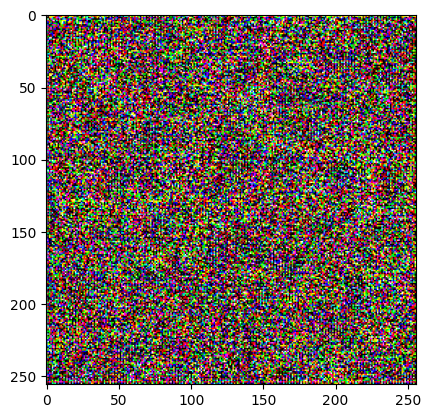

In [ ]:
%matplotlib inline

rgb_array = output[0].permute(1, 2, 0).detach().numpy()
rgb_array = rgb_array.clip(0, 1)
plt.imshow(rgb_array)